# Exploration of Flight Delays
## by Florian Steger

## Investigation Overview

> The overall goal of this investigation is to find the main reasons of delay for flights within the US and to findthe main drivers of delays. This could be specific carriers, airports or delay causes.

## Dataset Overview

> This dataset reports flights in the United States, including
carriers, arrival and departure delays, reasons for delays and other variables.<br>
> Overall there are 29 columns and 7009728 rows. <br>
More details on the data set can be found here: http://stat-computing.org/dataexpo/2009/the-data.html

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
flight2008 = pd.read_csv('2008.csv')

In [4]:
flights_clean = flight2008.copy()

In [16]:
flights_clean['Count'] = 1

## Distribution of Arrival Delays

The distribution of Arrival Delays is nearly normally distributed just squeezed and skewed to the right. Interestingly the huge amount of flights seem to be a little bit ahaed of their scheduled arrival time. 

There are also a few huge outliers in the Arrival Delay column, some flights are massively delayed and one flight is more than 8 hours too early (I cut these outlieres off to make the chart easier to read.

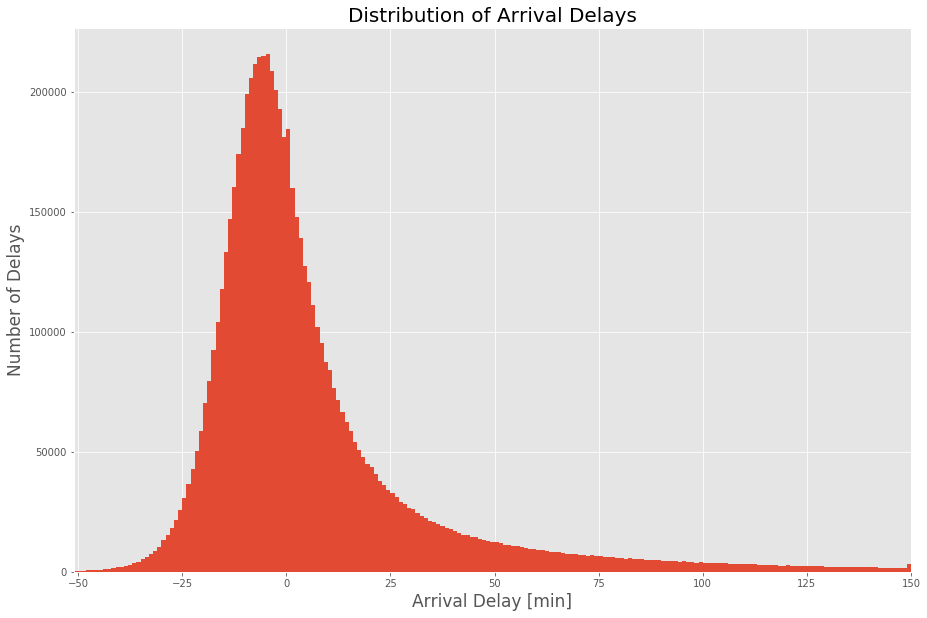

In [38]:
bins = np.arange(-51, 151, 1)

plt.figure(figsize=[15, 10])
plt.style.use('ggplot')
plt.hist(data = flights_clean, x = 'ArrDelay', bins = bins)
plt.xlim(-51, 150)
plt.xlabel('Arrival Delay [min]', fontsize=17)
plt.ylabel('Number of Delays', fontsize=17)
plt.title('Distribution of Arrival Delays', fontsize=20)
plt.show();
#plt.rcParams.update({'font.size': 22})

## Delay causes in percent

Most Arrival Delays are caused by Late Aircrafts, closely followed by NAS issues. But the longest Delays in average are caused by weather conditions, followed again by NAS issues. So it could be stated, that NAS issues are the worst causes, since they are very frequent and cause longer delays on average.

In [8]:
for dataset in flights_clean:
    flights_clean.loc[flights_clean['CarrierDelay'] >= 15, 'DelayCause'] = 'C'
    flights_clean.loc[flights_clean['WeatherDelay'] >= 15, 'DelayCause'] = 'W'
    flights_clean.loc[flights_clean['NASDelay'] >= 15, 'DelayCause'] = 'N'
    flights_clean.loc[flights_clean['SecurityDelay'] >= 15, 'DelayCause'] = 'S'
    flights_clean.loc[flights_clean['LateAircraftDelay'] >= 15, 'DelayCause'] = 'L'

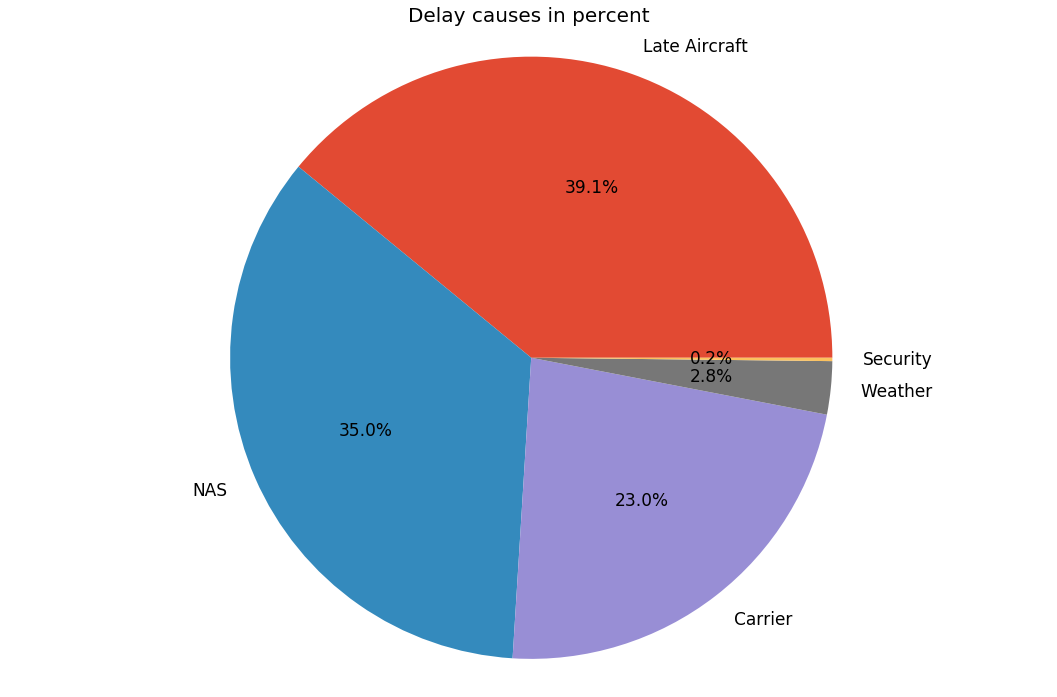

In [63]:
plt.rcParams.update({'font.size': 17})
fig, ax = plt.subplots(figsize=(15, 10))

values = flights_clean['DelayCause'].value_counts()
labels = ['Late Aircraft', 'NAS', 'Carrier', 'Weather', 'Security']

ax.pie(values, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Delay causes in percent', fontsize=20)

fig.tight_layout()
plt.draw()

## Sum of delays by category over time

Seeing the delays over time makes clear that there are months with a much higher number of delays than others. The month with the most delays is December. The second most delays are in June. This might be due to holiday season and weather conditions in winter.

In [12]:
months_sum = flights_clean.groupby(['Month']).sum()

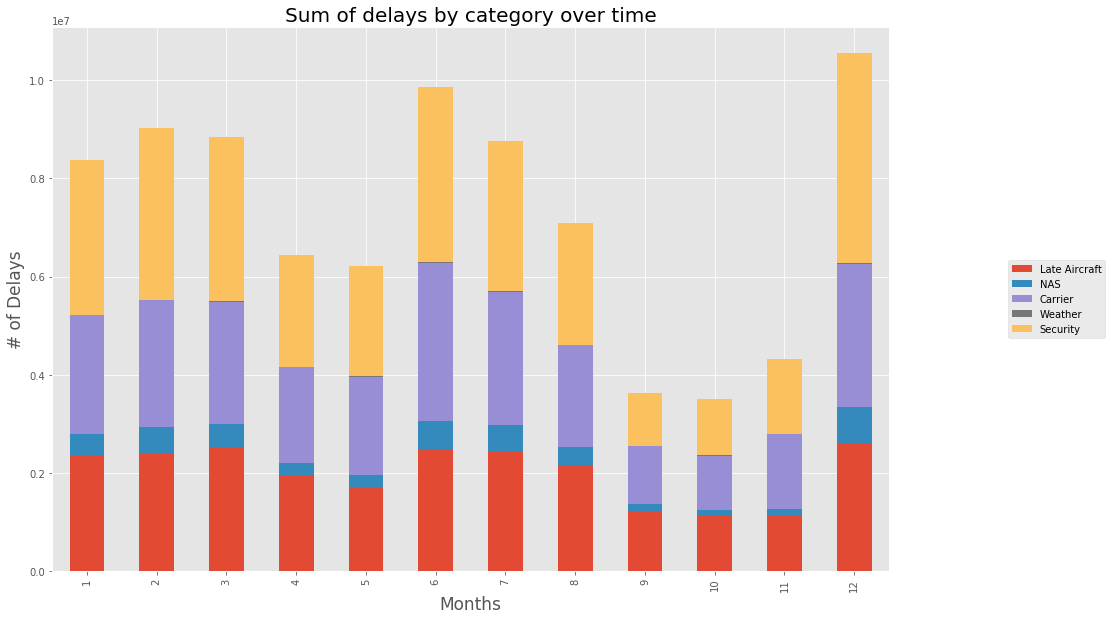

In [57]:
plt.style.use('ggplot')
months_sum[['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].plot(kind='bar', stacked=True, figsize=[15, 10]);
plt.title('Sum of delays by category over time', fontsize=20)
plt.xlabel('Months', fontsize=17)
plt.ylabel('# of Delays', fontsize=17)
plt.legend(labels, loc="center", bbox_to_anchor=(1.2,0.5));

## Average Delay by Airline

Interstingly the size of the airline (by # of flights) does not seem to have a big impact on the average delay. There are smaller and bigger bubbles spread across the chart. Airlines with an average Departure Delay of >6 mins tend to keep this delay until arrival. Airlines with average Departure Delay of <6 mins seem to increase their delay until arrival slightly. One interesting outlier is the biggest bubble (Soutwestern) which is the biggest airline. They tend to increase the delay from departure to arrival much more than the other airlines

In [17]:
carrier_sum = flights_clean.groupby(['UniqueCarrier']).sum()
carrier_avg = flights_clean.groupby(['UniqueCarrier']).mean()
frames = [carrier_sum['Count'], carrier_avg['ArrDelay'], carrier_avg['DepDelay']]
airline_data = pd.concat(frames, axis=1)
airline_data['Count'] = airline_data['Count'] / 250

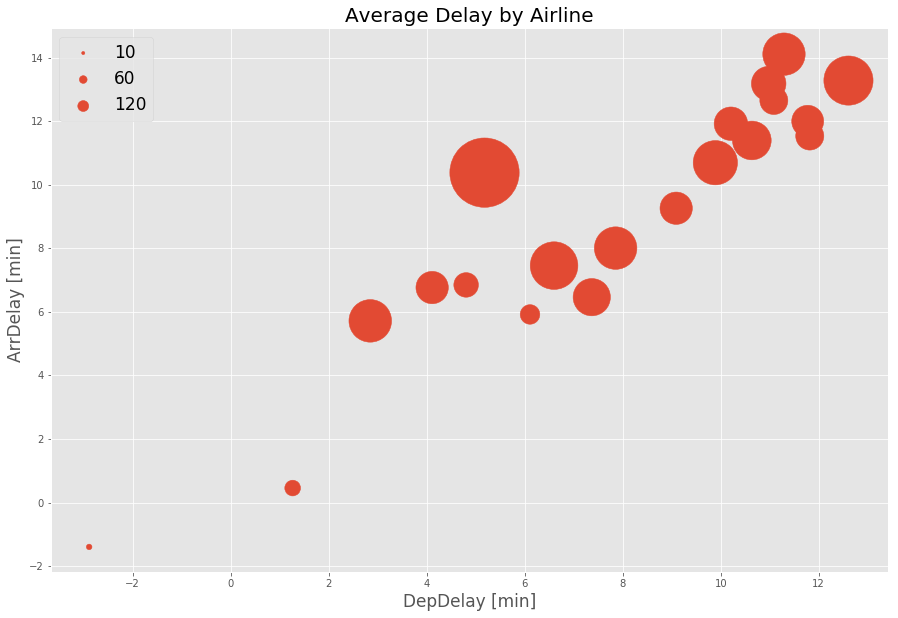

In [61]:
plt.figure(figsize=(15,10))
plt.style.use('ggplot')
plt.scatter(data = airline_data, x = 'ArrDelay', y = 'DepDelay', s = 'Count')
plt.title('Average Delay by Airline', fontsize=20)
plt.xlabel('DepDelay [min]', fontsize=17)
plt.ylabel('ArrDelay [min]', fontsize=17);

# dummy series for adding legend
sizes = [10, 60, 120]
base_color = sb.color_palette()
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes, fontsize=17);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!